In [9]:
! pip install tensorflow 

In [10]:
! pip install keras

In [11]:
! pip install nltk


In [12]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install regex


Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

# Update Keras imports to use TensorFlow's Keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import eval

from collections import Counter
import nltk
import string
from nltk.corpus import stopwords
import regex as re

# Input data files
import os
print(os.listdir("../project"))


['.vscode', '1429_1.csv.zip', 'app.py', 'app1.py', 'Consumer Reviews of Amazon Products.docx', 'file.csv', 'mpermanent_subset.csv', 'mymodel.keras', 'sentiment-analysis-on-amazon-product-rnn-97-acc.ipynb', 'templates', 'venv', '__pycache__']


In [15]:
data=pd.read_csv('../project/file.csv')
data.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15664\2407434384.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('../project/file.csv')


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [11]:
# yelp['label'] = ['1' if star > 3 else '0' for star in yelp['stars']];

In [16]:
review=pd.DataFrame(data.groupby('reviews.rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

,reviews.rating,No of Users
0,5.0,23775
1,4.0,8541
2,3.0,1499
3,1.0,410
4,2.0,402


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 10))
sns.set_color_codes("pastel")
sns.barplot(y="reviews.rating", x="No of Users", data=review.iloc[:20, :10],label="Score", color="pink")

ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(xlabel="No of People",ylabel="Rating")
sns.despine(left=True, bottom=True)
plt.show()

In [17]:
permanent = data[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
mpermanent=permanent.dropna()
mpermanent.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [18]:
check =  mpermanent[mpermanent["reviews.text"].isnull()]
check.head()

,reviews.rating,reviews.text,reviews.title,reviews.username


In [19]:
actualrating = mpermanent[(mpermanent['reviews.rating'] == 1.0) | (mpermanent['reviews.rating'] == 5)]
actualrating.shape


(24174, 4)

In [20]:
y = actualrating['reviews.rating']
x = actualrating['reviews.text'].reset_index()
# X =x[xindex(False)]

In [21]:
len(y)
# len(X)

24174

In [22]:
X = x['reviews.text']
print(X)

0        This product so far has not disappointed. My c...
1        great for beginner or experienced person. Boug...
2        Inexpensive tablet for him to use and learn on...
3        I bought this for my grand daughter when she c...
4        This amazon fire 8 inch tablet is the perfect ...
                               ...                        
24169    This is exactly like any other usb power charg...
24170    Amazon should include this charger with the Ki...
24171    Love my Kindle Fire but I am really disappoint...
24172    I was surprised to find it did not come with a...
24173    to spite the fact that i have nothing but good...
Name: reviews.text, Length: 24174, dtype: object


In [23]:
print(len(X))

24174


In [24]:
import string
from nltk.corpus import stopwords
# stop=set(stopwords.words('english'))
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [25]:
tokens = X[0].split()
print(tokens)

['This', 'product', 'so', 'far', 'has', 'not', 'disappointed.', 'My', 'children', 'love', 'to', 'use', 'it', 'and', 'I', 'like', 'the', 'ability', 'to', 'monitor', 'control', 'what', 'content', 'they', 'see', 'with', 'ease.']


In [26]:
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
# next we need to vectorize our input variable (X)
#we use the count vectoriser function and the analyser we use is the above lines of code
# this should return a vector array
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [28]:
len(bow_transformer.vocabulary_)

16954

In [29]:
review_24 = X[24]

In [30]:
bow_25 = bow_transformer.transform([review_24])
bow_25

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 14 stored elements and shape (1, 16954)>

In [31]:
print(bow_25)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 14 stored elements and shape (1, 16954)>
  Coords	Values
  (0, 1816)	1
  (0, 2476)	1
  (0, 5664)	1
  (0, 7835)	1
  (0, 10671)	1
  (0, 10778)	1
  (0, 11499)	1
  (0, 11691)	1
  (0, 11940)	1
  (0, 14868)	1
  (0, 15195)	1
  (0, 15507)	1
  (0, 16158)	1
  (0, 16540)	1


In [32]:
X = bow_transformer.transform(X)

In [33]:
#Lets start training the model
from sklearn.model_selection import train_test_split
#using 30% of the data for testing, this will be revised once we do not get the desired accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Naive Bayes Classifier**

In [34]:
! pip install scikit-learn

In [35]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [36]:
preds = nb.predict(X_test)

In [37]:
print(X.shape)
print(len(y))

(24174, 16954)
24174


In [38]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
nb.score(X_train, y_train)

[[  14  119]
 [  42 7078]]


              precision    recall  f1-score   support

         1.0       0.25      0.11      0.15       133
         5.0       0.98      0.99      0.99      7120

    accuracy                           0.98      7253
   macro avg       0.62      0.55      0.57      7253
weighted avg       0.97      0.98      0.97      7253



0.9844571833815968

**support vector machine**

In [39]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) 
predsvm=clf.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, predsvm))
predsvm=clf.predict(X_test)
clf.score(X_train,y_train)

[[  14  119]
 [  42 7078]]


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       133
         5.0       0.98      1.00      0.99      7120

    accuracy                           0.98      7253
   macro avg       0.49      0.50      0.50      7253
weighted avg       0.96      0.98      0.97      7253



c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

0.9909579812067845

**KNeighborsClassifier**

In [41]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 

KNeighborsClassifier(n_neighbors=3)

In [42]:
predsknn=neigh.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predsknn))
print('\n')
print(classification_report(y_test, predsknn))
neigh.score(X_train,y_train)

[[   8  125]
 [   0 7120]]


              precision    recall  f1-score   support

         1.0       1.00      0.06      0.11       133
         5.0       0.98      1.00      0.99      7120

    accuracy                           0.98      7253
   macro avg       0.99      0.53      0.55      7253
weighted avg       0.98      0.98      0.98      7253



0.9843980852195496

**GradientBoostingClassifier**

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(X_train, y_train)
predicted= model.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predicted))
print('\n')
print(classification_report(y_test, predicted))
model.score(X_train,y_train)

[[   0  133]
 [   0 7120]]


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       133
         5.0       0.98      1.00      0.99      7120

    accuracy                           0.98      7253
   macro avg       0.49      0.50      0.50      7253
weighted avg       0.96      0.98      0.97      7253



c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

0.9836298091129366

In [46]:
positive_review = actualrating['reviews.text'][2]
positive_review

'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

In [47]:
positive_review_transformed = bow_transformer.transform([positive_review])
nb.predict(positive_review_transformed)[0]

np.float64(5.0)

In [48]:
positive_review = actualrating['reviews.text'][11]
positive_review

'Excellent product. Easy to use, large screen makes watching movies and reading easier.'

In [49]:
positive_review_transformed = bow_transformer.transform([positive_review])
model.predict(positive_review_transformed)[0]

np.float64(5.0)

In [50]:
negative_review = mpermanent['reviews.text'][34650]
print(negative_review) 


Although the description states that this will work on my Kindle Fire HDX 8.9, when I plug the charger to the Kindle, I receive a message that the charger is not of sufficient wattage to properly charge the Kindle. I bought this charger as a back up for when I travel. The original charger which came with the Kindle does not show this warning when I plug it in.


In [51]:
negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

np.float64(5.0)

In [52]:
negative_review_transformed = bow_transformer.transform([negative_review])
neigh.predict(negative_review_transformed)[0]

np.float64(5.0)

In [53]:
negative_review = mpermanent['reviews.text'][34656]
print(negative_review)

Amazon should include this charger with the Kindle. The fact that they're charging us extra for something that should be included is a sign of cheapness. Plus, you can use any micro-USB phone charger instead of this to charge your Kindle. Save your money.


In [54]:
negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

np.float64(5.0)

In [55]:
negative_review_transformed = bow_transformer.transform([negative_review])
neigh.predict(negative_review_transformed)[0]

np.float64(5.0)

In [56]:
#we need to have a label for 
# lets have a label which group the stars into two groups, 1 for good, 0 for bad 
# so anything more than 3 , 3 being neutral is good, rest bad
# data['label'] = ['1' if reviews.rating > 3 else '0' for reviews.rating in data['reviews.rating']];
mpermanent['label'] = ['1' if star >= 3 else '0' for star in mpermanent['reviews.rating']];

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15664\2865325864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpermanent['label'] = ['1' if star >= 3 else '0' for star in mpermanent['reviews.rating']];


In [57]:
mpermanent

,reviews.rating,reviews.text,reviews.title,reviews.username,label
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter,1
1,5.0,great for beginner or experienced person. Boug...,very fast,truman,1
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,1
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,1
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,1
...,...,...,...,...,...
34655,3.0,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,Kris,1
34656,1.0,Amazon should include this charger with the Ki...,Should be included,Jonathan Stewart,0
34657,1.0,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,J Lawson,0
34658,1.0,I was surprised to find it did not come with a...,Not worth the money,Just the Buyer,0


In [58]:
mpermanent.tail()

,reviews.rating,reviews.text,reviews.title,reviews.username,label
34655,3.0,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,Kris,1
34656,1.0,Amazon should include this charger with the Ki...,Should be included,Jonathan Stewart,0
34657,1.0,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,J Lawson,0
34658,1.0,I was surprised to find it did not come with a...,Not worth the money,Just the Buyer,0
34659,1.0,to spite the fact that i have nothing but good...,as with everyone else,sandi,0


In [59]:
reviews = mpermanent['reviews.text']
labels = mpermanent['label']

In [60]:
print(len(reviews))

34614


In [61]:
print(len(labels))

34614


In [62]:
reviews[3]

"I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands."

In [63]:
stop = set(stopwords.words('english'))

In [64]:
def clean_document(doco):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', doco)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop])
#     doco_clean = [spell(word) for word in doco_clean]
#     p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
#     doco_clean = ([spell(k) for k in doco_clean])
    return doco_clean

In [65]:
# Generate a cleaned reviews array from original review texts
review_cleans = [clean_document(doc) for doc in reviews]
sentences = [' '.join(r) for r in review_cleans ]

In [66]:
print(sentences[7])

gave christmas gift inlaws husband uncle loved easy use fantastic features


In [67]:
print(reviews[7])

I gave this as a Christmas gift to my inlaws, husband and uncle. They loved it and how easy they are to use with fantastic features!


In [68]:
reviews.shape
# sentences.shape

(34614,)

In [69]:
#Keras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [70]:
import pickle

# Assuming 'tokenizer' is the trained tokenizer object
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Tokenizer has been saved as 'tokenizer.pkl'")


Tokenizer has been saved as 'tokenizer.pkl'


In [71]:
text_sequences = list(tokenizer.texts_to_sequences(sentences))
sequence_dict = tokenizer.word_index
word_dict = dict((num, val) for (val, num) in sequence_dict.items())


In [72]:
print(tokenizer.word_index)

{'great': 1, 'tablet': 2, 'use': 3, 'love': 4, 'easy': 5, 'amazon': 6, 'kindle': 7, 'good': 8, 'bought': 9, 'one': 10, 'fire': 11, 'price': 12, 'like': 13, 'product': 14, 'would': 15, 'works': 16, 'get': 17, 'echo': 18, 'much': 19, 'music': 20, 'read': 21, 'alexa': 22, 'kids': 23, 'loves': 24, 'apps': 25, 'well': 26, 'books': 27, 'reading': 28, 'device': 29, 'best': 30, 'really': 31, 'buy': 32, 'games': 33, 'time': 34, 'old': 35, 'screen': 36, 'purchased': 37, 'also': 38, 'play': 39, 'got': 40, 'gift': 41, 'better': 42, 'recommend': 43, 'set': 44, 'year': 45, 'perfect': 46, 'nice': 47, 'new': 48, 'home': 49, 'little': 50, 'light': 51, 'even': 52, 'quality': 53, 'purchase': 54, 'using': 55, 'prime': 56, 'need': 57, 'lot': 58, 'christmas': 59, 'battery': 60, 'size': 61, 'able': 62, 'movies': 63, 'want': 64, 'first': 65, 'everything': 66, 'happy': 67, 'many': 68, 'son': 69, 'work': 70, 'sound': 71, 'still': 72, 'daughter': 73, 'things': 74, 'used': 75, 'app': 76, 'fun': 77, 'reader': 78, 

In [73]:
print(type(sentences))
print(len(sentences))
print(sentences[:5])

<class 'list'>
34614
['product far disappointed children love use like ability monitor control content see ease', 'great beginner experienced person bought gift loves', 'inexpensive tablet use learn step nabi thrilled learn skype already', 'fire two weeks love tablet great value prime members tablet shines love able easily access prime content well movies download watch laterthis screen really nice look nice crisp bright infact brighter ipad pro costing base model build fire insanely awesome running 7mm thick smooth glossy feel back really amazing hold like futuristic tab hands', 'bought grand daughter comes visit set user entered age name amazon makes sure accesses sites content appropriate age simple loves capabilities also bought installed 64gig card gives little tablet plenty storage price think tablet best one spend hundreds dollars additional speed capacity comes basics tablets everything people ever need fraction cost']


In [74]:
from IPython.display import display
display(text_sequences)

[[14, 82, 431, 203, 4, 3, 13, 298, 1357, 129, 212, 166, 307],
 [1, 666, 1779, 472, 9, 41, 24],
 [361, 2, 3, 321, 848, 1944, 994, 321, 1587, 201],
 [11,
  125,
  452,
  4,
  2,
  1,
  176,
  56,
  636,
  2,
  3173,
  4,
  62,
  215,
  133,
  56,
  212,
  26,
  63,
  124,
  79,
  7258,
  36,
  31,
  47,
  273,
  47,
  756,
  406,
  7259,
  1706,
  83,
  1309,
  4328,
  1204,
  308,
  922,
  11,
  5684,
  84,
  757,
  7260,
  2723,
  670,
  5685,
  331,
  117,
  31,
  108,
  282,
  13,
  4329,
  541,
  322],
 [9,
  583,
  73,
  329,
  1707,
  44,
  145,
  4330,
  538,
  587,
  6,
  121,
  181,
  4877,
  1378,
  212,
  1142,
  538,
  142,
  24,
  501,
  38,
  9,
  635,
  5686,
  200,
  447,
  50,
  2,
  526,
  233,
  12,
  154,
  2,
  30,
  10,
  469,
  1272,
  869,
  593,
  299,
  1161,
  329,
  1481,
  85,
  66,
  380,
  185,
  57,
  1558,
  253],
 [6,
  11,
  762,
  2,
  46,
  61,
  37,
  261,
  453,
  36,
  127,
  803,
  10,
  157,
  461,
  792,
  15,
  8,
  54],
 [1, 28, 47, 51, 281, 

In [75]:
from IPython.display import display
display(sequence_dict)

{'great': 1,
 'tablet': 2,
 'use': 3,
 'love': 4,
 'easy': 5,
 'amazon': 6,
 'kindle': 7,
 'good': 8,
 'bought': 9,
 'one': 10,
 'fire': 11,
 'price': 12,
 'like': 13,
 'product': 14,
 'would': 15,
 'works': 16,
 'get': 17,
 'echo': 18,
 'much': 19,
 'music': 20,
 'read': 21,
 'alexa': 22,
 'kids': 23,
 'loves': 24,
 'apps': 25,
 'well': 26,
 'books': 27,
 'reading': 28,
 'device': 29,
 'best': 30,
 'really': 31,
 'buy': 32,
 'games': 33,
 'time': 34,
 'old': 35,
 'screen': 36,
 'purchased': 37,
 'also': 38,
 'play': 39,
 'got': 40,
 'gift': 41,
 'better': 42,
 'recommend': 43,
 'set': 44,
 'year': 45,
 'perfect': 46,
 'nice': 47,
 'new': 48,
 'home': 49,
 'little': 50,
 'light': 51,
 'even': 52,
 'quality': 53,
 'purchase': 54,
 'using': 55,
 'prime': 56,
 'need': 57,
 'lot': 58,
 'christmas': 59,
 'battery': 60,
 'size': 61,
 'able': 62,
 'movies': 63,
 'want': 64,
 'first': 65,
 'everything': 66,
 'happy': 67,
 'many': 68,
 'son': 69,
 'work': 70,
 'sound': 71,
 'still': 72,
 'daugh

In [76]:
from IPython.display import display
display(word_dict)

{1: 'great',
 2: 'tablet',
 3: 'use',
 4: 'love',
 5: 'easy',
 6: 'amazon',
 7: 'kindle',
 8: 'good',
 9: 'bought',
 10: 'one',
 11: 'fire',
 12: 'price',
 13: 'like',
 14: 'product',
 15: 'would',
 16: 'works',
 17: 'get',
 18: 'echo',
 19: 'much',
 20: 'music',
 21: 'read',
 22: 'alexa',
 23: 'kids',
 24: 'loves',
 25: 'apps',
 26: 'well',
 27: 'books',
 28: 'reading',
 29: 'device',
 30: 'best',
 31: 'really',
 32: 'buy',
 33: 'games',
 34: 'time',
 35: 'old',
 36: 'screen',
 37: 'purchased',
 38: 'also',
 39: 'play',
 40: 'got',
 41: 'gift',
 42: 'better',
 43: 'recommend',
 44: 'set',
 45: 'year',
 46: 'perfect',
 47: 'nice',
 48: 'new',
 49: 'home',
 50: 'little',
 51: 'light',
 52: 'even',
 53: 'quality',
 54: 'purchase',
 55: 'using',
 56: 'prime',
 57: 'need',
 58: 'lot',
 59: 'christmas',
 60: 'battery',
 61: 'size',
 62: 'able',
 63: 'movies',
 64: 'want',
 65: 'first',
 66: 'everything',
 67: 'happy',
 68: 'many',
 69: 'son',
 70: 'work',
 71: 'sound',
 72: 'still',
 73: 'd

Grapical Represtentation

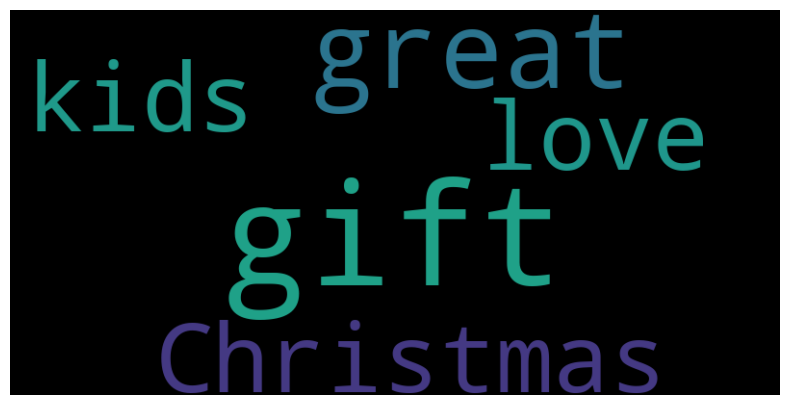

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Sample text data (can be replaced with actual data)
text = "A great Christmas gift, the kids love the gifts..."

# Creating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


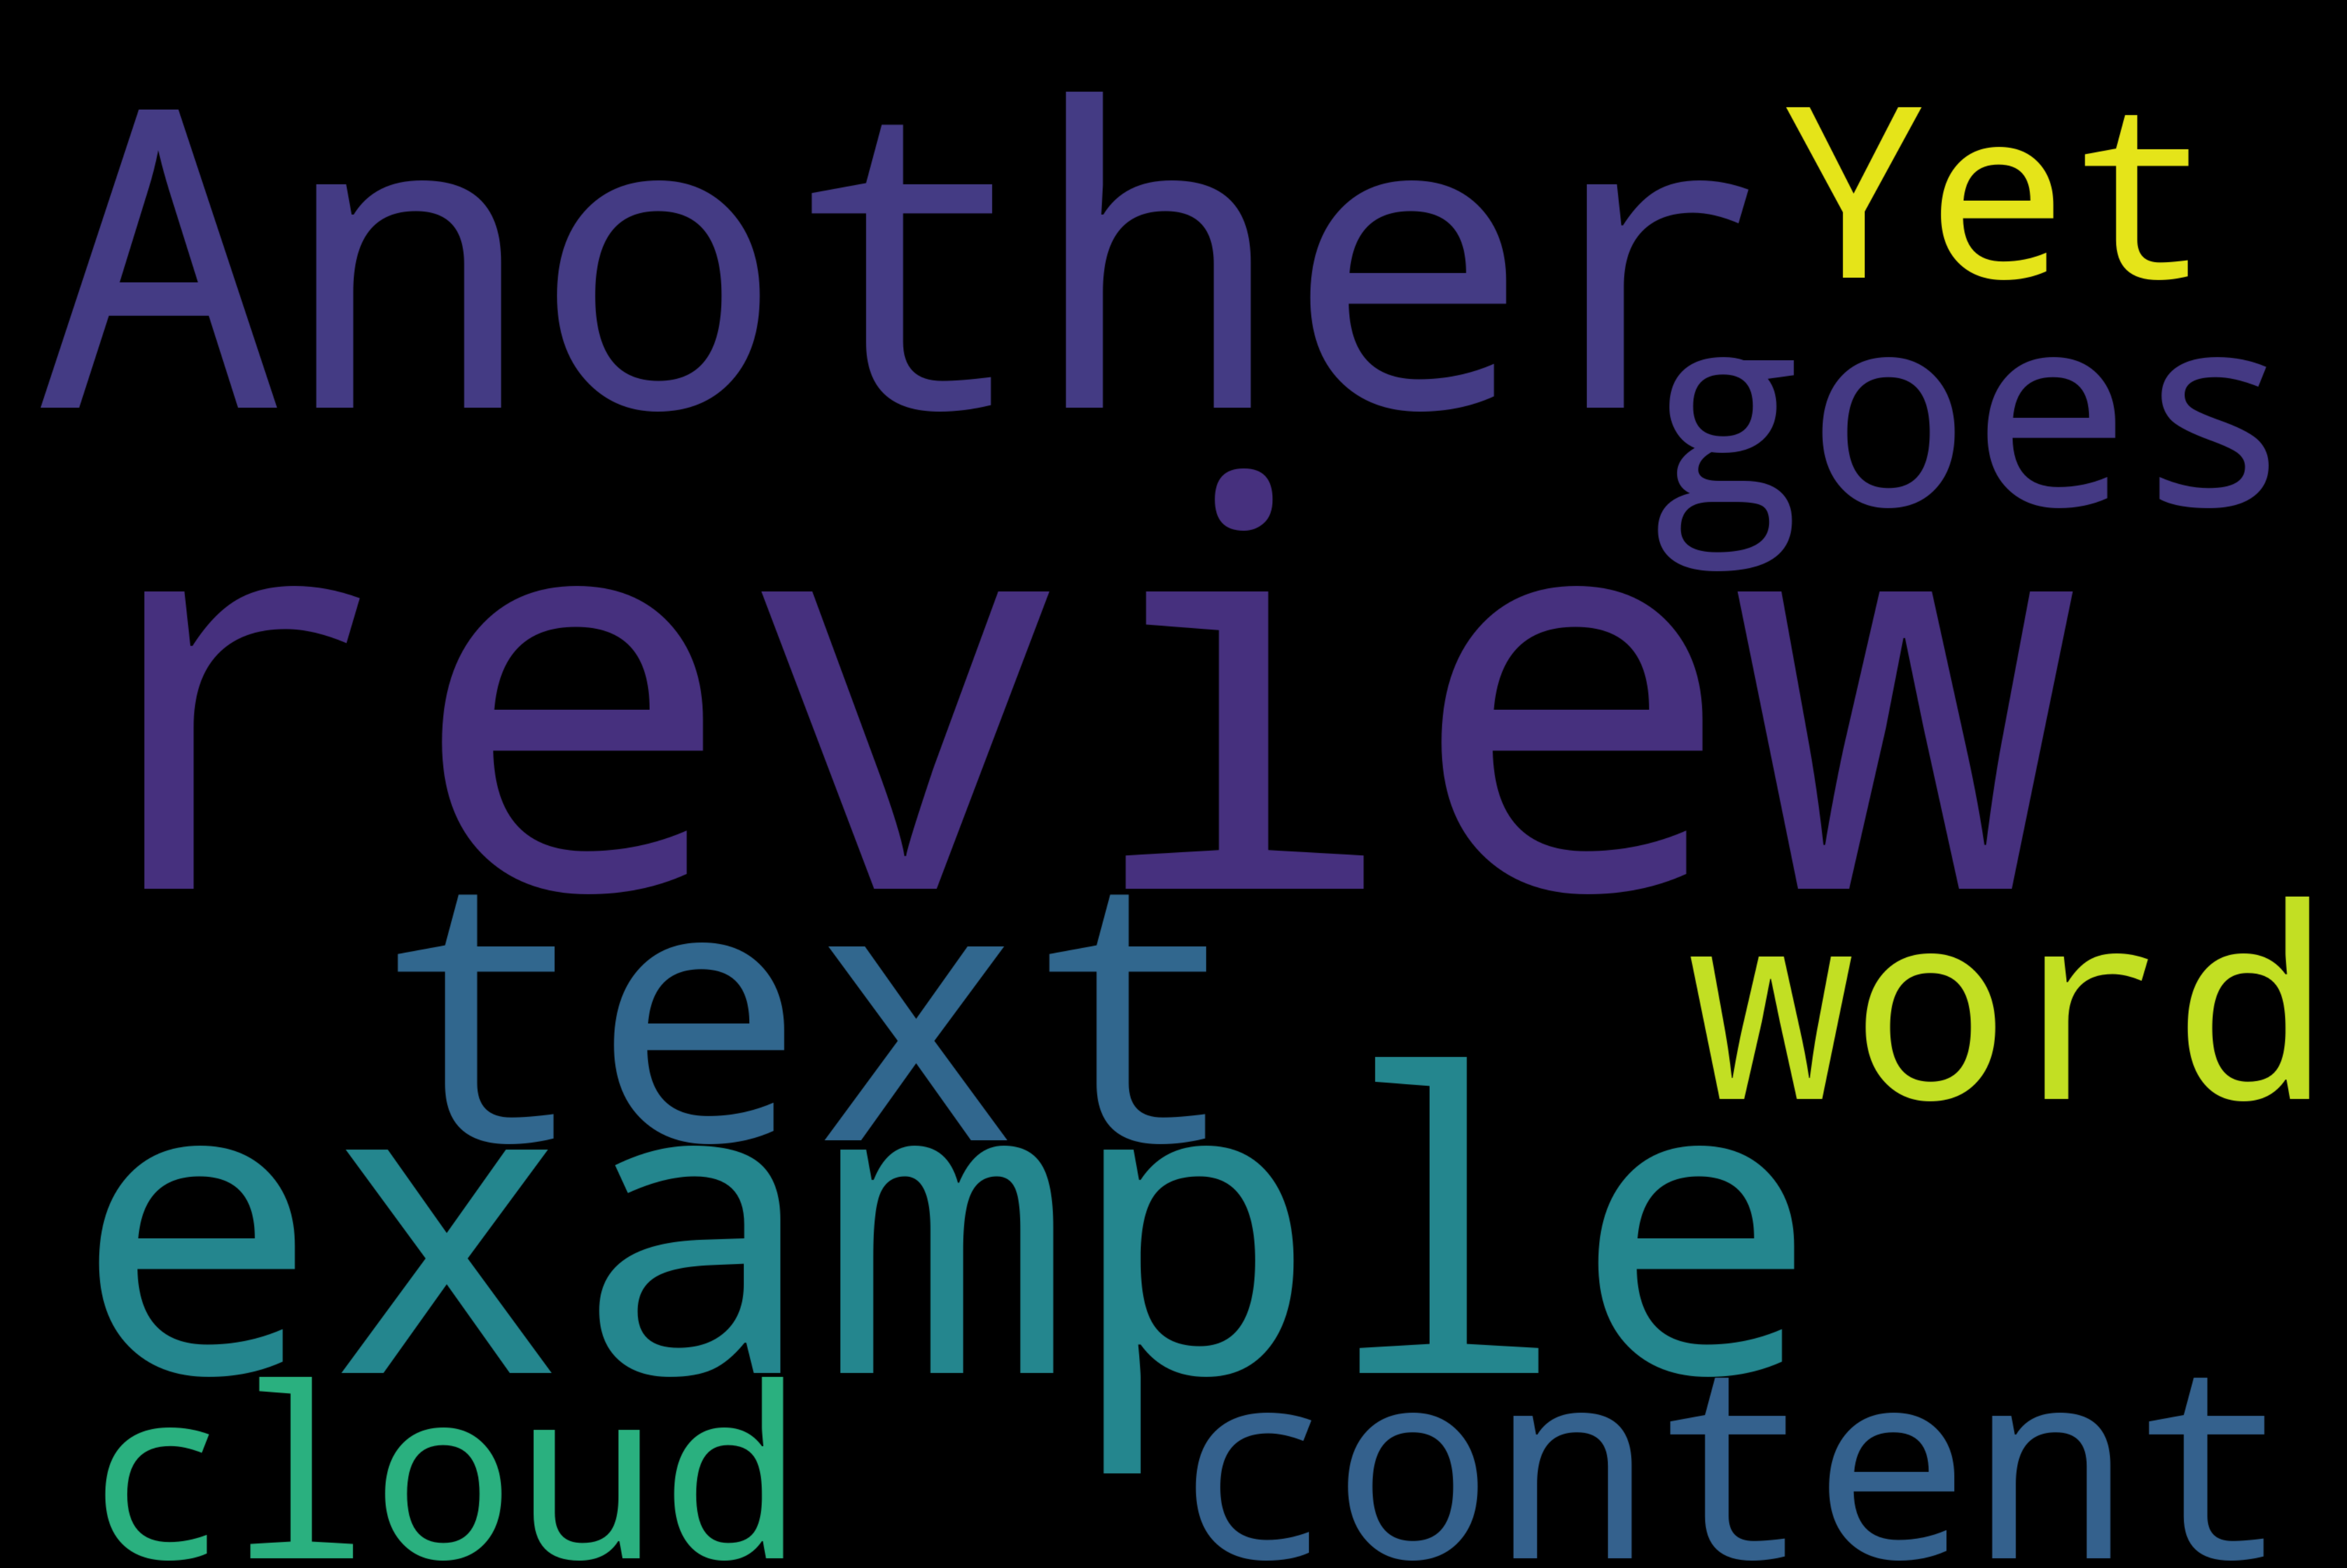

In [78]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Example DataFrame
data = {
    'reviews': [
        'This is an example review.',
        'Another review text goes here.',
        'More review content for the word cloud.',
        'Yet another example review text.'
    ]
}
neutral_review = pd.DataFrame(data)

# Ensure the 'reviews' column exists in neutral_review
if 'reviews' in neutral_review.columns:
    text = " ".join(review for review in neutral_review["reviews"])
    wordcloud = WordCloud(
        width=3000,
        height=2000,
        background_color='black',
        stopwords=STOPWORDS
    ).generate(text)

    fig = plt.figure(
        figsize=(40, 30),
        facecolor='k',
        edgecolor='k'
    )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
else:
    print("The 'reviews' column is not found in neutral_review")


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15664\2398011632.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sentiment', y='Helpful Review Rate', data=df, inner='box', palette='muted')


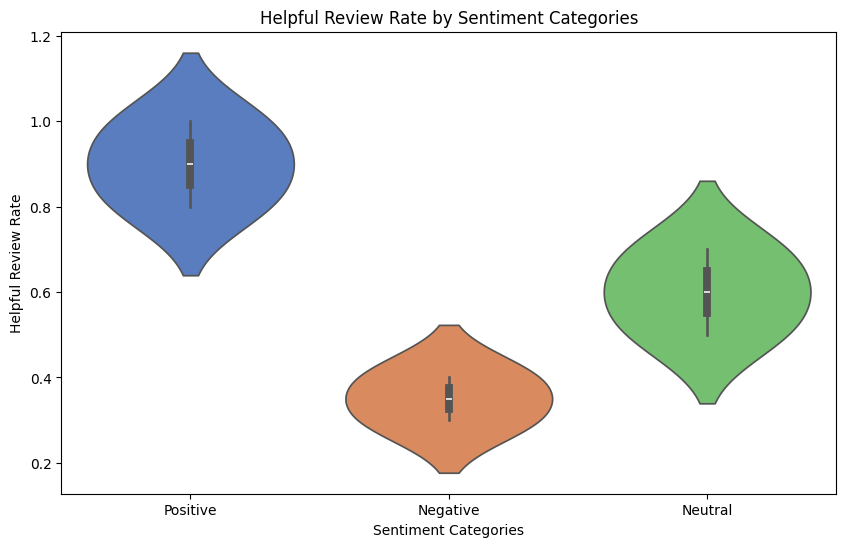

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample Data
data = {
    'Sentiment': ['Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Neutral'],
    'Helpful Review Rate': [0.9, 1.0, 0.8, 0.3, 0.4, 0.5, 0.6, 0.7]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sentiment', y='Helpful Review Rate', data=df, inner='box', palette='muted')

# Customize the plot
plt.title('Helpful Review Rate by Sentiment Categories')
plt.xlabel('Sentiment Categories')
plt.ylabel('Helpful Review Rate')

# Show the plot
plt.show()


Confusion matrix, without normalization
[[2 1 0]
 [1 1 1]
 [1 0 2]]


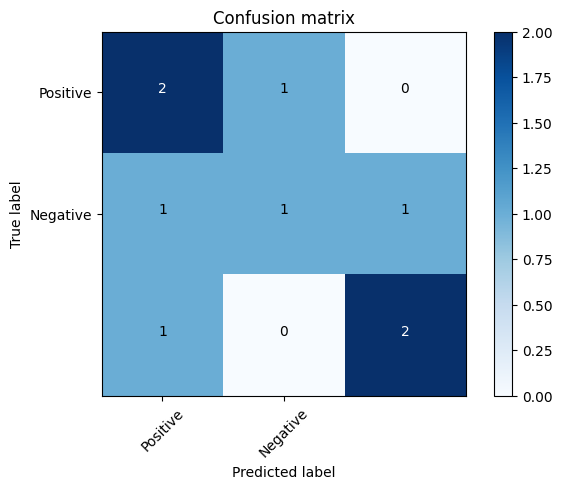

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# Example data: Replace these with your actual test labels and predictions
y_test = [0, 1, 2, 0, 1, 2, 0, 1, 2]
y_pred = [0, 0, 2, 0, 2, 2, 1, 1, 0]

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Import itertools for plotting
import itertools

# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['Positive','Negative'], title='Confusion matrix')
plt.show()


In [81]:
reviews_encoded = []
for i, review in enumerate(review_cleans):
    # Ensure `review` is iterable
    if isinstance(review, pd.DataFrame):  # Unlikely, but defensive programming
        review = review.values.flatten().tolist()
    elif isinstance(review, str):  # Split strings into characters
        review = list(review)
    
    # Map characters to the sequence dictionary
    try:
        encoded_review = [sequence_dict[x] for x in review]
        reviews_encoded.append(encoded_review)
    except KeyError as e:
        print(f"KeyError at index {i}: {e}")


(array([   7.,   72.,  114.,  211.,  873., 2237., 3498., 3492., 3037.,
        2425., 2066., 1715., 1440., 1357., 1158.,  946.,  898.,  798.,
         742.,  646.,  599.,  537.,  466.,  783.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <BarContainer object of 24 artists>)

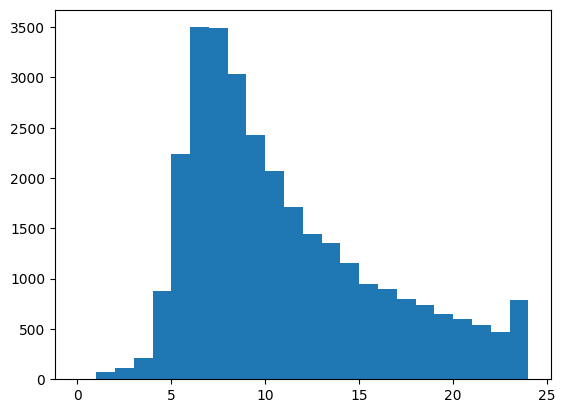

In [82]:
lengths = [len(x) for x in reviews_encoded]
plt.hist(lengths, bins=range(25))

In [83]:
print(reviews_encoded[135])

[807, 6, 2, 8, 2, 12, 949, 521, 292, 153, 1709, 728, 659, 8, 395, 3, 2, 138, 547, 432, 110, 1948, 70, 1242, 15, 43, 187, 112, 253, 1536, 2]


In [84]:
max_cap =8
X = pad_sequences(reviews_encoded, maxlen=max_cap, truncating='post')

In [85]:
Y = np.array([[0,1] if '0' in label else [1,0] for label in labels])

In [86]:
np.random.seed(1024);
random_posits = np.arange(len(X))
np.random.shuffle(random_posits);

In [87]:
X = X[random_posits];
Y = Y[random_posits];

In [88]:
train_cap = int(0.85 * len(X));
dev_cap = int(0.93 * len(X));

In [89]:
X_train, Y_train = X[:train_cap], Y[:train_cap]
X_dev, Y_dev = X[train_cap:dev_cap], Y[train_cap:dev_cap]
X_test1, Y_test1 = X[dev_cap:], Y[dev_cap:]

In [90]:
! pip install keras==2.3.1

  Using cached Keras-2.3.1-py2.py3-none-any.whl.metadata (2.2 kB)
Using cached Keras-2.3.1-py2.py3-none-any.whl (377 kB)
  Attempting uninstall: keras
    Found existing installation: keras 3.6.0
    Uninstalling keras-3.6.0:
      Successfully uninstalled keras-3.6.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires keras>=3.5.0, but you have keras 2.3.1 which is incompatible.


In [91]:
! pip install --upgrade tensorflow keras

  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [92]:
print(X_train.shape, y_train.shape)

(29421, 8) (16921,)


In [93]:
print(X_train[:5])
print(y_train[:5])

[[   0 1375   65  733  283  598  111 1210]
 [   4    2   30   10   82   51  281    5]
 [   0    0    0    0  613   41 1333   67]
 [  29 1389   88 1181  337  193   95  355]
 [  97  317  686   58  160   34   38  317]]
11662    5.0
25747    5.0
24869    5.0
19930    5.0
17853    5.0
Name: reviews.rating, dtype: float64


In [94]:
print(len(X_train), len(y_train))

29421 16921


In [95]:
print(f"Number of training samples: {len(X_train)}")
print(f"Number of training labels: {len(Y_train)}")


Number of training samples: 29421
Number of training labels: 29421


In [96]:
from sklearn.model_selection import train_test_split

# Assuming you have your full dataset X and Y
# Split data into training and validation sets
X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check the shapes
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_dev shape: {X_dev.shape}")
print(f"Y_dev shape: {Y_dev.shape}")


X_train shape: (27691, 8)
Y_train shape: (27691, 2)
X_dev shape: (6923, 8)
Y_dev shape: (6923, 2)


In [97]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomUniform

# Initialize the model
model1 = Sequential()

# Add Embedding layer with input shape explicitly defined
model1.add(Embedding(input_dim=len(word_dict) + 1, output_dim=8, input_length=8))

# Add LSTM layers
model1.add(LSTM(150, return_sequences=True))
model1.add(LSTM(150, return_sequences=False))

# Add Dense layers with proper kernel initializer
model1.add(Dense(100, activation='relu', kernel_initializer=RandomUniform()))  # best 50, relu
model1.add(Dense(2, activation='sigmoid', kernel_initializer=RandomUniform()))

# Build the model by providing an input shape
model1.build(input_shape=(None, 8))

# Print model summary
print(model1.summary())

# Compile the model
optimizer = Adam(learning_rate=0.0001, decay=0.0001)
model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Fit the model (replace X_train, Y_train, X_dev, Y_dev with your actual data variables)
# model1.fit(X_train, Y_train, batch_size=16, epochs=5, validation_data=(X_dev, Y_dev))
model1.fit(X_train, Y_train, batch_size=16, epochs=5, validation_data=(X_dev, Y_dev))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 8, 8)           │       106,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 8, 150)         │        95,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 150)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 398,182 (1.52 MB)

 Trainable params: 398,182 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


None
Epoch 1/5
1731/1731 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9743 - loss: 0.2248 - val_accuracy: 0.9767 - val_loss: 0.1003
Epoch 2/5
1731/1731 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9768 - loss: 0.0903 - val_accuracy: 0.9767 - val_loss: 0.0968
Epoch 3/5
1731/1731 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9769 - loss: 0.0794 - val_accuracy: 0.9767 - val_loss: 0.0978
Epoch 4/5
1731/1731 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9780 - loss: 0.0716 - val_accuracy: 0.9766 - val_loss: 0.1011
Epoch 5/5
1731/1731 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.9781 - loss: 0.0694 - val_accuracy: 0.9759 - val_loss: 0.1048


In [98]:
score = model1.evaluate(X_test1, Y_test1)
print("Test accuracy: %0.4f%%" % (score[1]*100))

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9814 - loss: 0.0717
Test accuracy: 97.8539%


In [99]:
model1.save('mymodel.keras')

In [100]:
import keras
savemodel=keras.models.load_model('mymodel.keras')

In [101]:
X_test1

array([[1481,   50,  216, ...,    8,  775,   23],
       [   4, 1232,  327, ..., 1291,  102,  111],
       [   7, 3163,  108, ..., 2247, 2965,  232],
       ...,
       [   0,    0,   14, ...,   42,   35,   10],
       [  10,  716, 1891, ...,   17,    8,   12],
       [1577,  171, 1347, ...,    2,   17,   76]], dtype=int32)

In [102]:
X_test

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 98521 stored elements and shape (7253, 16954)>

In [103]:
X_test1[0]

array([1481,   50,  216,    1,   12,    8,  775,   23], dtype=int32)

In [104]:
X_test_sample = X_test1[..., np.newaxis]

In [105]:
X_test_sample[0]

array([[1481],
       [  50],
       [ 216],
       [   1],
       [  12],
       [   8],
       [ 775],
       [  23]], dtype=int32)

In [106]:

predications=savemodel.predict(X_test_sample[0]) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


In [107]:
binary_predictions = np.argmax(predications, axis=1)

In [108]:
sum(binary_predictions)

np.int64(8)

In [109]:
len(binary_predictions)

8

In [110]:
result=sum(binary_predictions)/len(binary_predictions)*100

In [111]:
def get_label(prob):
     if prob > 0.5:
         return 'Negative'
     else:
          return 'Positive'
      

In [112]:
label=get_label(result)
print(f'The sentiment of the given sentence is {label}')

The sentiment of the given sentence is Negative


In [113]:
binary_predictions

array([1, 1, 1, 1, 1, 1, 1, 1])

In [115]:
import numpy as np

# Assuming 'X_test1' is your test dataset
X_test_sample = X_test1[..., np.newaxis]

# Placeholder for all predictions
all_predictions = []

# Iterate over each sample in the test set and make predictions
for i in range(len(X_test_sample)):
    predictions = savemodel.predict(X_test_sample[i])
    binary_predictions = np.argmax(predictions, axis=1)
    sentiment_score = sum(binary_predictions) / len(binary_predictions) * 100
    all_predictions.append(sentiment_score)

def get_label(prob):
    if prob > 50:
        return 'Negative'
    else:
        return 'Positive'

# Generate labels for each sentiment score
labels = [get_label(score) for score in all_predictions]

# Print the results
for i, label in enumerate(labels):
    print(f'The sentiment of text {i+1} is {label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

In [116]:
labels = [get_label(score) for score in all_predictions]
for i, label in enumerate(labels):
    print(f'The sentiment of text {i+1} is {label}')



The sentiment of text 1 is Negative
The sentiment of text 2 is Negative
The sentiment of text 3 is Negative
The sentiment of text 4 is Negative
The sentiment of text 5 is Negative
The sentiment of text 6 is Negative
The sentiment of text 7 is Negative
The sentiment of text 8 is Negative
The sentiment of text 9 is Negative
The sentiment of text 10 is Negative
The sentiment of text 11 is Negative
The sentiment of text 12 is Negative
The sentiment of text 13 is Negative
The sentiment of text 14 is Negative
The sentiment of text 15 is Negative
The sentiment of text 16 is Negative
The sentiment of text 17 is Negative
The sentiment of text 18 is Negative
The sentiment of text 19 is Negative
The sentiment of text 20 is Negative
The sentiment of text 21 is Negative
The sentiment of text 22 is Negative
The sentiment of text 23 is Negative
The sentiment of text 24 is Negative
The sentiment of text 25 is Negative
The sentiment of text 26 is Negative
The sentiment of text 27 is Negative
The sentim